# The Stack Overflow Developer Survey

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')


data = pd.read_csv('C:/Users/hasan/Downloads/survey_results_public_2019.csv') #changed the source
#data_this_year = pd.read_csv('survey_results_public2020.csv')
pd.set_option('display.max_columns', 100) # displays enough columns


In [2]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [3]:
#data.info()

In [4]:
data.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
schema_df = pd.read_csv('C:/Users/hasan/Downloads/survey_results_schema_2019.csv')
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [6]:
column_definitions = schema_df[schema_df['Column'].isin(data.columns)]

for col, row in column_definitions.iterrows():
    print(row['Column'])
    print(row['QuestionText'], '\n')

Respondent
Randomized respondent ID number (not in order of survey response time) 

MainBranch
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." 

Hobbyist
Do you code as a hobby? 

OpenSourcer
How often do you contribute to open source? 

OpenSource
How do you feel about the quality of open source software (OSS)? 

Employment
Which of the following best describes your current employment status? 

Country
In which country do you currently reside? 

Student
Are you currently enrolled in a formal, degree-granting college or university program? 

EdLevel
Which of the following best describes the highest level of formal education that you’ve completed? 

UndergradMajor
What was your main or most important field of study? 

EduOther
Which of the following types of non-degree education have you used or participated in? Please select all that apply. 

OrgSize
Approximately how many people are employed by the company or organizatio

In [7]:
#check for missed values
#List of all the coloumns with missing values
data.isna().any()

Respondent      False
MainBranch       True
Hobbyist        False
OpenSourcer     False
OpenSource       True
                ...  
Sexuality        True
Ethnicity        True
Dependents       True
SurveyLength     True
SurveyEase       True
Length: 85, dtype: bool

In [8]:
print('Number of columns:',len(data.columns.to_list()))
print('Number of columns with missing values:',len(data.columns[data.isnull().any()].to_list()))

Number of columns: 85
Number of columns with missing values: 82


In [9]:
#Percentage of missing values
data.isnull().sum()/data.shape[0] *100

Respondent       0.000000
MainBranch       0.621041
Hobbyist         0.000000
OpenSourcer      0.000000
OpenSource       2.296277
                  ...    
Sexuality       14.328949
Ethnicity       13.742785
Dependents       6.552434
SurveyLength     2.136517
SurveyEase       2.027384
Length: 85, dtype: float64

In [10]:
#columns with more than 35% missing values
print(data.columns[data.isnull().mean()>0.35].to_list())
print('Number of columns with more than 35% missing values:',len(data.columns[data.isnull().mean()>0.35].to_list()))

['CompTotal', 'ConvertedComp', 'CodeRevHrs', 'BlockchainOrg']
Number of columns with more than 35% missing values: 4


In [11]:
countries = data['Country'].unique()
print("Total Countries: {0}".format(len(countries)))

Total Countries: 180


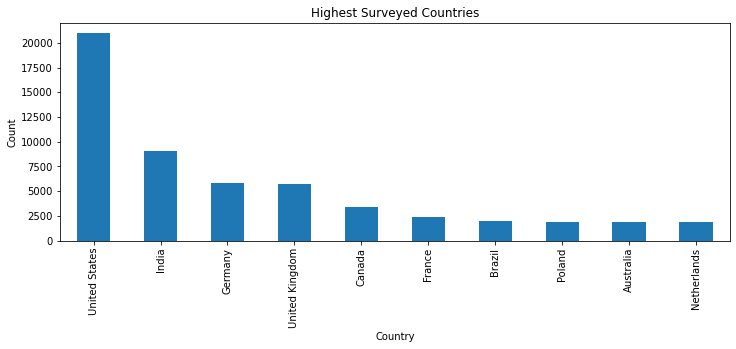

In [12]:
#Highest Surveyed Countries

top_ten=data['Country'].value_counts().nlargest(10)


plt.subplots(figsize=(12,4))
top_ten.plot.bar(title='Highest Surveyed Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [13]:
# EDA on used programming languages in this survey

temp=data['LanguageWorkedWith'].dropna() #clean data
language=[]
for i in temp:
    if (i != None and type(i) != int):
        x = i.split(";")
        language.append(x)



#count users of the used languages
from collections import Counter
import itertools


languages=list(itertools.chain.from_iterable(language)) #to get rid of the nested list

duplicate_dict = Counter(languages) #dictionary of langugaes and the number of its users

print(duplicate_dict)  

df_languages=pd.DataFrame.from_dict(duplicate_dict,orient='index', columns=['Total Users'])
df_languages


Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


,Total Users
HTML/CSS,55466
Java,35917
JavaScript,59219
Python,36443
C++,20524
C,18017
C#,27097
SQL,47544
VBA,4781
R,5048


In [14]:
#Usesd languages in each country

languages_list=list(df_languages.index.values)
print(languages_list)
grouped_Country = data.groupby(['Country'])


df = data['Country'].value_counts()
df.rename({'Country': 'Respondents'}, inplace= True)
for str in languages_list:
    if str=='C++':        #with c++ it doesn't work, why? see cell below ...
        continue
    temp = grouped_Country['LanguageWorkedWith'].apply(lambda x: x.str.contains(str).sum())
    df = pd.concat([df,temp], axis = 'columns', sort = False)
    df.rename(columns={'LanguageWorkedWith': str}, inplace= True)

        
df    

['HTML/CSS', 'Java', 'JavaScript', 'Python', 'C++', 'C', 'C#', 'SQL', 'VBA', 'R', 'Bash/Shell/PowerShell', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Other(s):', 'Go', 'PHP', 'Assembly', 'Kotlin', 'Swift', 'Objective-C', 'Elixir', 'Erlang', 'Clojure', 'F#', 'Scala', 'Dart']


,Country,HTML/CSS,Java,JavaScript,Python,C,C#,SQL,VBA,R,Bash/Shell/PowerShell,Ruby,Rust,TypeScript,WebAssembly,Other(s):,Go,PHP,Assembly,Kotlin,Swift,Objective-C,Elixir,Erlang,Clojure,F#,Scala,Dart
United States,20949,13488,16640,14672,10083,17348,6781,11829,1234,4644,9662,2617,879,4568,289,0,2343,3970,1494,1105,1549,1060,406,208,447,276,889,338
India,9061,5514,7275,5697,3105,7040,1699,4429,240,812,1658,382,74,1514,70,0,338,2565,605,565,569,537,36,34,40,28,230,175
Germany,5866,3446,4549,3577,2451,4710,1600,2920,365,951,2437,410,295,1299,71,0,539,1603,463,493,363,253,76,42,79,55,278,125
United Kingdom,5737,3722,4454,3946,2384,4774,2146,3147,400,935,2445,513,219,1198,76,0,467,1308,332,295,321,204,72,41,99,107,251,85
Canada,3395,2146,2690,2323,1558,2821,1081,1863,210,629,1450,374,125,752,41,0,363,760,259,181,256,162,53,33,54,41,119,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tonga,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Timor-Leste,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
North Korea,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
Brunei Darussalam,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
data['LanguageWorkedWith'].str.contains('C++').sum() #see cell above

error: multiple repeat at position 2

In [17]:
py_us=grouped_Country['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum()).loc['United States']
print('Python users in the United States:', py_us)

Python users in the United States: 10083


Salary range (USD): from 0.0 to 2000000.0


<AxesSubplot:xlabel='YearsCode'>

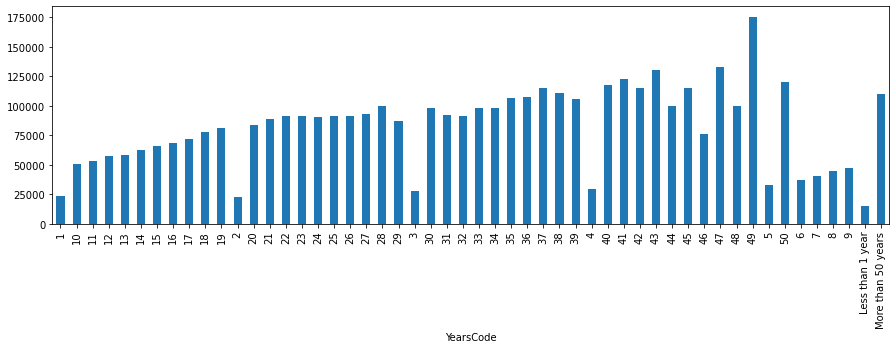

In [18]:
#how much they got paid
# for working with salaries the problem is that total money and purchasing power are different? f.e compare India and US
# focus on US/EU?
salary = data['ConvertedComp'].dropna().unique()
min_s=min(salary)
max_s=max(salary)

print('Salary range (USD): from' ,(min_s),'to' ,(max_s))

df = data.groupby(['YearsCode']).median()['ConvertedComp']
df.plot.bar(figsize=(15,4)) #how to sort the columns, why doenst it work the right way automatically?

In [19]:
#Highest payed language? (todo)

In [20]:
#Average income Per Country

# Plot map
import geopandas
import plotly.offline as py
py.init_notebook_mode(connected=True)


#Create a new dataframe for the world map
contry_salaries = pd.DataFrame({'Country':data['Country'],'Salary':data['ConvertedComp']})
contry_salaries = contry_salaries.groupby('Country').median().reset_index()



data_geo = [dict(
        type = 'choropleth',# World map
        locations = contry_salaries.Country,
        locationmode = 'country names',
        z = contry_salaries.Salary,
        colorscale = [[0,"#081D58"],[0.35,"#253494"],
                      [0.5,"#225EA8"],
            [0.6,"#1D91C0"],[0.7,"#41B6C4"],
                      [1,"#7FCDBB"]],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(0,0,0)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = ''),
      ) ]

layout = dict(
    title = 'Level avarage income per country',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig1 = dict(data=data_geo, layout=layout)
py.iplot(fig1, validate=False)


#the scale is up to 800k, why?

In [21]:
#gender/race pay gap present in developer industry? if so, did it get better over time (todo?)?
#do we have enough data?
data.shape[0]-data['ConvertedComp'].isna().sum()
#55823 is enough
data['ConvertedComp'].median()

57287.0

In [22]:
data['Gender'].value_counts() #Most answered binary, so the others are statiscally irrelevant.

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [23]:
# separating male and female: 

male = data[data.Gender == 'Man']  
female = data[data.Gender == 'Woman']  

In [24]:
#male to female ratio in the survey
male.shape[0]/female.shape[0]

12.282313997477932

In [25]:
GenderSalary = data.groupby(['Gender', 'Country'])['ConvertedComp']

gender_gap=(((GenderSalary.median()['Man']/GenderSalary.median()['Woman'])-1)*100)[top_ten.index] #top_ten = highest surveyed countries, for others the values become unusable
print(gender_gap)
# is this represantive? what happend in Indea?
# for germany the results are only 1% off, this site says 18% for 2019 https://www.destatis.de/DE/Themen/Arbeit/Arbeitsmarkt/Qualitaet-Arbeit/Dimension-1/gender-pay-gap.html

United States     14.343029
India             70.270270
Germany           17.021356
United Kingdom    20.454032
Canada            18.422187
France             5.807759
Brazil            37.511436
Poland            42.887701
Australia         22.835656
Netherlands       28.434949
Name: ConvertedComp, dtype: float64


Text(0, 0.5, 'Gender gap percent')

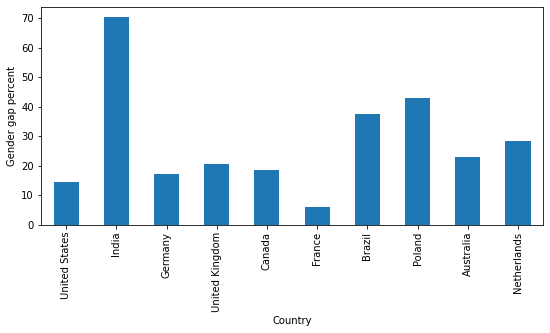

In [26]:
gender_gap.plot.bar(figsize=(9,4))
plt.xlabel('Country')
plt.ylabel('Gender gap percent')

<AxesSubplot:xlabel='EdLevel'>

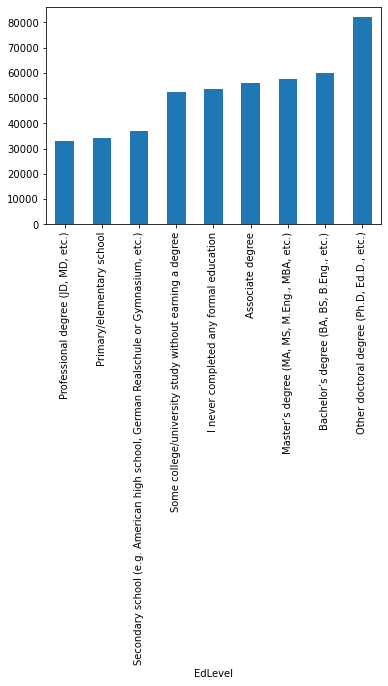

In [27]:
#the effect of euducation level on salaries
EdLevelSalary = data.groupby(['EdLevel'])['ConvertedComp'].median().sort_values() #need to be commented
EdLevelSalary.plot.bar()

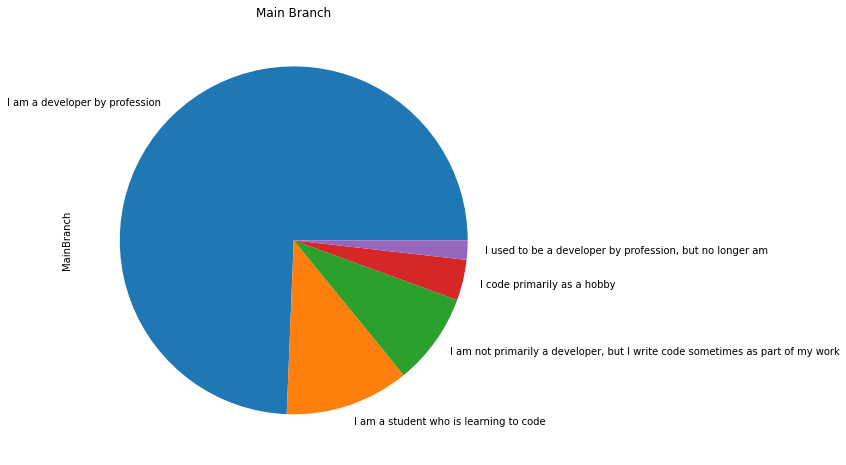

In [28]:
# Proffession of surveyed users
proffession=data['MainBranch'].value_counts()
proffession.plot(kind='pie',figsize=(8,8),title='Main Branch')
plt.show()

In [29]:
#Let's see which country has the maximum full-time Employees
top_cnt_Employment_ft = data[data['Employment']== 'Employed full-time']['Country'].value_counts()
print("Maximum Full time employee country: {0}".format(top_cnt_Employment_ft.index[0]))

Maximum Full time employee country: United States


<AxesSubplot:xlabel='Years of coding experience', ylabel='Programmers'>

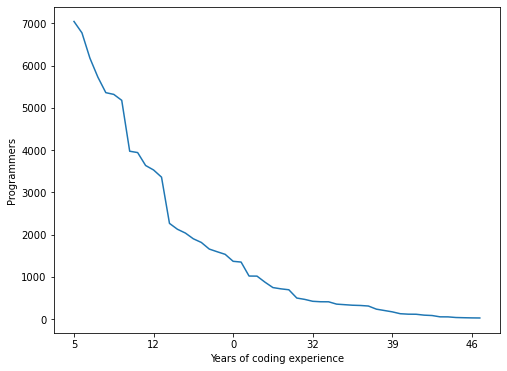

In [30]:
#let's have a look on coding experience ..
# but first, we should clean our data from non numeric values

data['YearsCode'].replace({'Less than 1 year': 0}, inplace=True)
data['YearsCode'].replace({'More than 50 years': 50}, inplace=True)
experience = data['YearsCode'].value_counts()
plt.xlabel("Years of coding experience")
plt.ylabel("Programmers")
experience.plot(figsize=(8,6))

Text(0.5, 1.0, 'Relationship between Salary and Years of Coding for Satisfaction level')

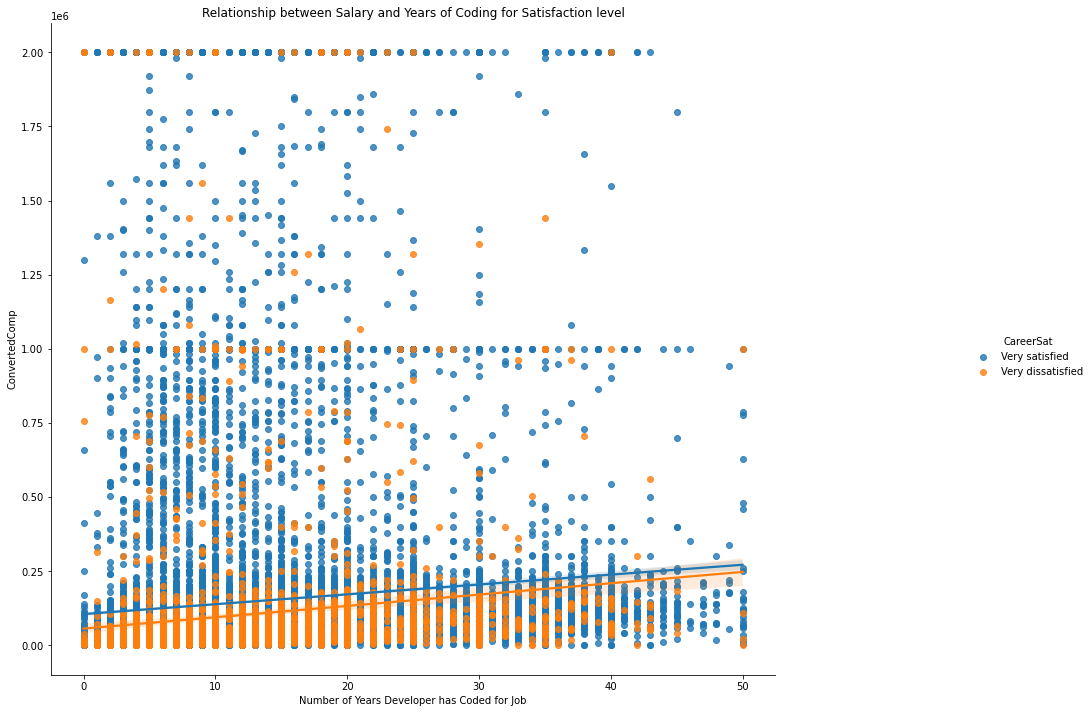

In [51]:
#Relationship between Salary and Years of Coding for Satisfaction level

multidata = data[['CareerSat','ConvertedComp', 'YearsCode']].dropna(axis=0, how='any')
multidata = multidata.astype({"ConvertedComp": int,"YearsCode": int})

to_drop1=multidata[(multidata.CareerSat == 'Neither satisfied nor dissatisfied')].index
to_drop2=multidata[(multidata.CareerSat == 'Slightly satisfied')].index
to_drop3=multidata[(multidata.CareerSat == 'Slightly dissatisfied')].index

multidata = multidata.drop(to_drop1)
multidata = multidata.drop(to_drop2)
multidata = multidata.drop(to_drop3)


import seaborn as sns


g=sns.lmplot(y='ConvertedComp', x='YearsCode', data=multidata, hue='CareerSat')
g.fig.set_figwidth(17)
g.fig.set_figheight(11)
plt.xlabel('Number of Years Developer has Coded for Job')
plt.title('Relationship between Salary and Years of Coding for Satisfaction level')

In [49]:
#Is it possible to predict whether a developer is looking for a new job or not?


print("The question as in the survey: " + schema_df[schema_df['Column'] == "JobSeek"]['QuestionText'].tolist()[0])

# What are the possible answers for JobSeekingStatus?

print("Answers:")
print(data['JobSeek'].dropna().unique())

The question as in the survey: Which of the following best describes your current job-seeking status?
Answers:
['I am actively looking for a job'
 'I’m not actively looking, but I am open to new opportunities'
 'I am not interested in new job opportunities']


In [33]:
# Delete rows without a JobSeeking Status
df_reg = data.dropna(subset=['JobSeek'], axis=0)

print(df_reg.shape)


(80555, 85)


In [34]:
X = df_reg.drop('JobSeek', axis=1) 
X = df_reg.select_dtypes(['number'])


num_cols = X.select_dtypes(include=['float','int']).columns #only numerical columns that will be used in prediction

for j in num_cols:
    X[j].fillna(X[j].mean(), inplace=True) # Fill the NaNs in numerical columns with the mean, NaN caused errors later

    
y = df_reg['JobSeek'] # Create two categories of developers: those who are interested in a new job and those who are not
y = df_reg['JobSeek'] == 'I am not interested in new job opportunities' 

print(X.shape)
print(y.size)


X = X.iloc[:, 2].values.reshape(-1, 1)  # 'values' converts it into a numpy array
                                        # -1 means that calculate the dimension of rows, but have 1 column
    
print(y.value_counts())    

(80555, 6)
80555
False    59475
True     21080
Name: JobSeek, dtype: int64


In [35]:
# prediction
#test train sample ..

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

print(X_train.shape)
print(y_train.size)

(53971, 1)
53971


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('std_scaler', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [37]:
#train and fit data

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV



log_reg = LogisticRegressionCV()
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)


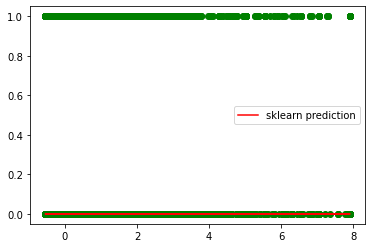

sklearn score: 0.7402572976226302
cross validtion score: [0.73736868 0.73735409 0.73735409]


In [38]:
# score: How well does it predict?

plt.scatter(X_train,y_train,color='green')
plt.plot(X_test, y_pred_log_reg, color='r',label='sklearn prediction')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

print('sklearn score:',log_reg.score(X_test,y_test))
print('cross validtion score:',cross_val_score(log_reg,X_train,y_train, cv=3))

In [40]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.002,fit_prior=True)

bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bnb))
print(cross_val_score(bnb,X_train,y_train, cv=3))


Accuracy: 0.7402572976226302
[0.73736868 0.73735409 0.73735409]


In [41]:
from sklearn.svm import SVC

sv=SVC()
sv.fit(X_train,y_train)
sv.predict(X_test)
print(sv.score(X_test,y_test))
#print(cross_val_score(sv,X_train,y_train, cv=3))

0.7402572976226302


In [42]:
# What are possible values for job satisfaction?

data['JobSat'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [43]:
# Delete rows with no value for job satisfaction or salary
#and converted the values of job satisfaction into numerical scalal from 1(-) to 4(+)
df_sat = data.dropna(subset=['JobSat','ConvertedComp'], axis=0)
df_sat = df_sat.drop('Respondent', axis=1) #because this colums is numerical and may confuse our prediction :)
df_sat['JobSat'].replace({'Very dissatisfied':1,'Slightly dissatisfied':2,'Neither satisfied nor dissatisfied':3,'Slightly satisfied':4,'Very satisfied':5},inplace=True)
df_sat['JobSat'].value_counts()  

4    19193
5    17902
2     8608
3     6230
1     3833
Name: JobSat, dtype: int64

In [44]:
# Are both features linear correlated?
from scipy.stats import pearsonr
corr, _ = pearsonr(df_sat['ConvertedComp'], df_sat['JobSat'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.043


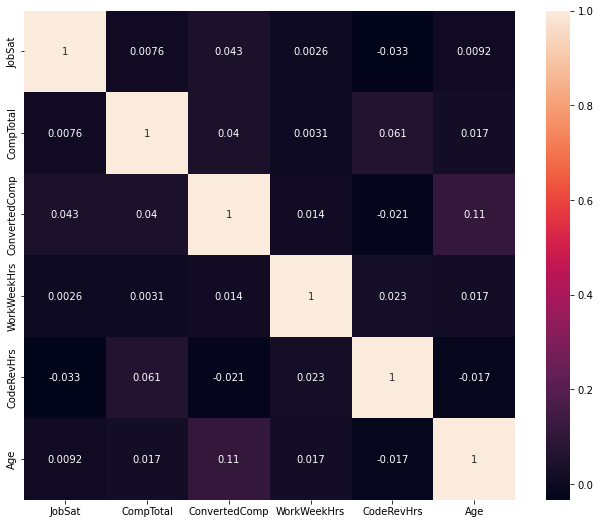

In [45]:
corr_df = df_sat.corr(method='pearson')
plt.figure(figsize=(11, 9))
sns.heatmap(corr_df, annot=True)
plt.show()
#wierd! no corr at all

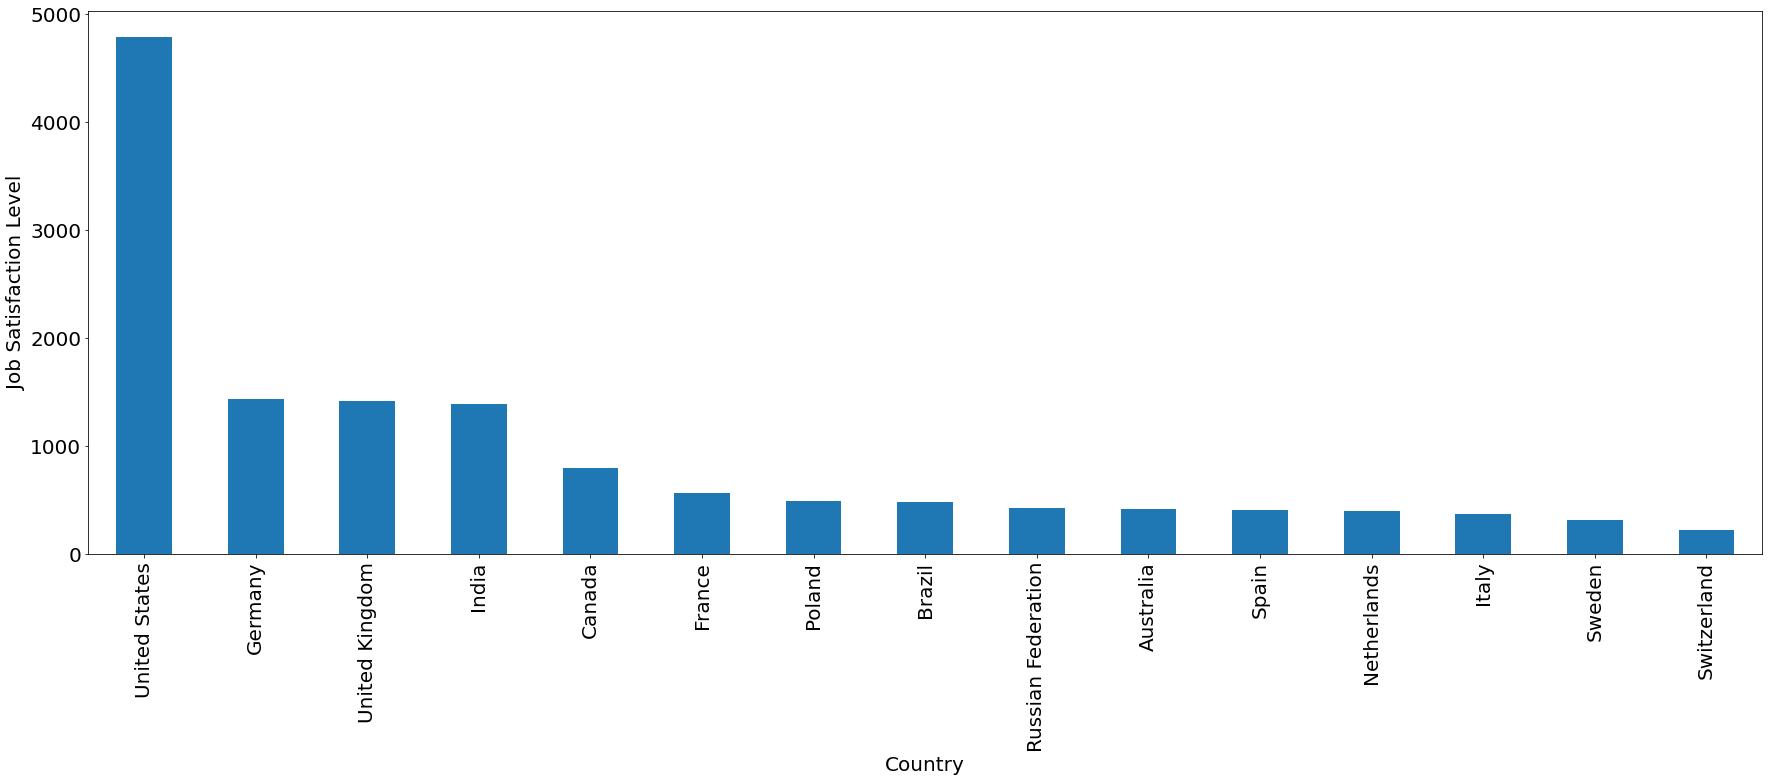

In [46]:
#Which contry has the highest Job Satisfaction Level
MostCareerSatisfactionCountry = df_sat[df_sat["JobSat"] == 4]["Country"].value_counts().iloc[:15]
plt.figure(figsize=(30,10))
MostCareerSatisfactionCountry.plot.bar()
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.xlabel("Country",fontsize= 20)
plt.ylabel("Job Satisfaction Level",fontsize= 20)
plt.show()